In [5]:
import pandas as pd
import string
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier

In [6]:
df_fake = pd.read_csv("/content/Fake.csv", on_bad_lines='skip')
df_true = pd.read_csv("/content/True.csv (1).zip")

In [7]:
df_fake.head(5)

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"


In [8]:
df_fake.shape

(23481, 4)

In [9]:
df_true.head(5)

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"


In [10]:
df_true.shape

(21417, 4)

In [11]:
df_fake['label'] = 0        # we add another column named label for fake is 0 and for true is 1
df_true['label'] = 1

In [12]:
df = pd.concat([df_fake, df_true], axis = 0).reset_index(drop = True)    # After we merge both dataset

In [13]:
df.head(5)

,title,text,subject,date,label
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",0
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",0
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",0
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",0
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",0


In [14]:
df.shape

(44898, 5)

In [15]:
df = df.drop(columns = ['title', 'subject', 'date'], axis = 1)

In [16]:
df

,text,label
0,Donald Trump just couldn t wish all Americans ...,0
1,House Intelligence Committee Chairman Devin Nu...,0
2,"On Friday, it was revealed that former Milwauk...",0
3,"On Christmas day, Donald Trump announced that ...",0
4,Pope Francis used his annual Christmas Day mes...,0
...,...,...
44893,BRUSSELS (Reuters) - NATO allies on Tuesday we...,1
44894,"LONDON (Reuters) - LexisNexis, a provider of l...",1
44895,MINSK (Reuters) - In the shadow of disused Sov...,1
44896,MOSCOW (Reuters) - Vatican Secretary of State ...,1


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44898 entries, 0 to 44897
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    44898 non-null  object
 1   label   44898 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 701.7+ KB


In [18]:
df.isnull().sum()

,0
text,0
label,0


In [19]:
nltk.download("stopwords")
nltk.download("wordnet")

stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def clean_text(text):
  text = re.sub(r"http\S+|www\S+|https\S+", '', text, flags=re.MULTILINE)  # remove URLs
  text = re.sub(r'\W', ' ', text)    # for remove punctuation
  text = re.sub(r'\d', '', text)     # for remove digits
  text = text.lower()
  tokens = [lemmatizer.lemmatize(word) for word in text.split() if word not in stop_words]
  return " ".join(tokens)

df['text'] = df['text'].apply(clean_text)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


In [20]:
x = df['text']
y = df['label']

In [21]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)

In [22]:
tfid = TfidfVectorizer()
xv_train = tfid.fit_transform(x_train)
xv_test = tfid.transform(x_test)

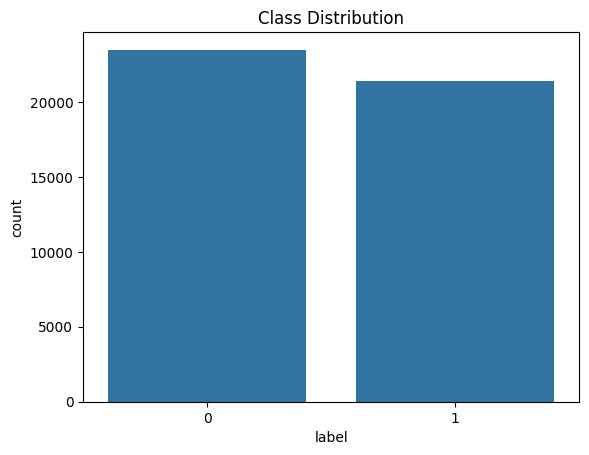

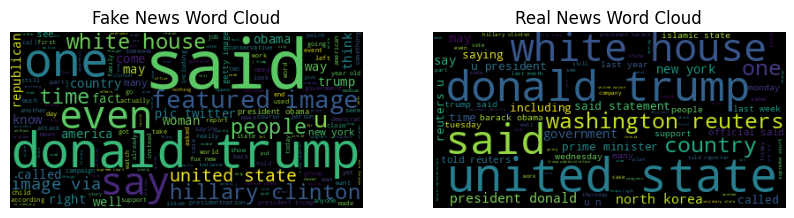

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.countplot(x='label', data=df)
plt.title('Class Distribution')
plt.show()

from wordcloud import WordCloud

fake_text = ' '.join(df[df['label']==0]['text'])
real_text = ' '.join(df[df['label']==1]['text'])

plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.imshow(WordCloud(width=400, height=200).generate(fake_text))
plt.title('Fake News Word Cloud')
plt.axis('off')

plt.subplot(1,2,2)
plt.imshow(WordCloud(width=400, height=200).generate(real_text))
plt.title('Real News Word Cloud')
plt.axis('off')
plt.show()

In [24]:
lr = LogisticRegression()
lr = lr.fit(xv_train, y_train)

In [25]:
y_pred = lr.predict(xv_test)

In [26]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1-score:", f1_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.9861915367483296
Precision: 0.984033810753698
Recall: 0.9868142218036261
F1-score: 0.9854220550199859
Confusion Matrix:
 [[4665   68]
 [  56 4191]]
Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.99      0.99      4733
           1       0.98      0.99      0.99      4247

    accuracy                           0.99      8980
   macro avg       0.99      0.99      0.99      8980
weighted avg       0.99      0.99      0.99      8980



In [27]:
dt = DecisionTreeClassifier()
dt.fit(xv_train, y_train)

DecisionTreeClassifier()

In [28]:
pred = dt.predict(xv_test)

In [29]:
print("Accuracy:", accuracy_score(y_test, pred))
print("Precision:", precision_score(y_test, pred))
print("Recall:", recall_score(y_test, pred))
print("F1-score:", f1_score(y_test, pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, pred))
print("Classification Report:\n", classification_report(y_test, pred))

Accuracy: 0.9951002227171493
Precision: 0.9945869616380325
Recall: 0.9950553331763597
F1-score: 0.9948210922787194
Confusion Matrix:
 [[4710   23]
 [  21 4226]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      4733
           1       0.99      1.00      0.99      4247

    accuracy                           1.00      8980
   macro avg       1.00      1.00      1.00      8980
weighted avg       1.00      1.00      1.00      8980



In [30]:
gbc = GradientBoostingClassifier()
gbc.fit(xv_train, y_train)


GradientBoostingClassifier()

In [31]:
pred_gbc = gbc.predict(xv_test)

In [32]:
print("accuracy", accuracy_score(pred_gbc, y_test))
print(classification_report(pred_gbc, y_test))

accuracy 0.9953229398663697
              precision    recall  f1-score   support

           0       0.99      1.00      1.00      4709
           1       1.00      0.99      1.00      4271

    accuracy                           1.00      8980
   macro avg       1.00      1.00      1.00      8980
weighted avg       1.00      1.00      1.00      8980



In [33]:
rfc = RandomForestClassifier()
rfc.fit(xv_train, y_train)

RandomForestClassifier()

In [34]:
pred_rfc = rfc.predict(xv_test)

In [35]:
print("accuracy_score", accuracy_score(pred_rfc, y_test))
print("Classification_report", classification_report(pred_rfc, y_test))

accuracy_score 0.9912026726057906
Classification_report               precision    recall  f1-score   support

           0       0.99      0.99      0.99      4728
           1       0.99      0.99      0.99      4252

    accuracy                           0.99      8980
   macro avg       0.99      0.99      0.99      8980
weighted avg       0.99      0.99      0.99      8980



In [36]:
def output_label(n):
    if n == 0:
        return "Fake News"
    elif n == 1:
        return "Not A Fake News"

def manual_testing(news):
    testing_news = {"text":[news]}
    new_def_test = pd.DataFrame(testing_news)
    new_def_test["text"] = new_def_test["text"].apply(clean_text)
    new_x_test = new_def_test["text"]
    new_xv_test = tfid.transform(new_x_test)
    y_pred = lr.predict(new_xv_test)
    pred = dt.predict(new_xv_test)
    pred_gbc = gbc.predict(new_xv_test)
    pred_rfc = rfc.predict(new_xv_test)

    return print("\n\nLR Prediction: {} \nDT Prediction: {} \nGBC Prediction: {} \nRFC Prediction: {}".format(output_label(y_pred[0]),
                                                                                                              output_label(pred[0]),
                                                                                                              output_label(pred_gbc[0]),
                                                                                                              output_label(pred_rfc[0])))

In [37]:
news = input("Enter news text: ")
manual_testing(news)


Enter news text: Trump Is So Obsessed He Even Has Obama’s Name...


LR Prediction: Fake News 
DT Prediction: Fake News 
GBC Prediction: Fake News 
RFC Prediction: Fake News
